In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


df = pd.read_csv('../Dataset/BancoDeDados.csv')

df.head()


,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [3]:
def plot_perc(st, dados):
    plt.figure(figsize=(20, 8))
    
    g = sns.countplot(x= st, data=dados, orient='horizontal', palette='Blues_r')
    g.set_ylabel('Contagem', fontsize=14)
    
    sizes = []
    
    for i in g.patches:
        h = i.get_height()
        sizes.append(h)
        g.text(i.get_x() + i.get_width()/1.6,
               h + 200,
               '{:1.2f}%'.format((h/len(dados))*100),
               ha = 'center', va='bottom',
               fontsize=12)
        
        g.set_ylim(0, max(sizes)*1.1)        
    

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3459334776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x= st, data=dados, orient='horizontal', palette='Blues_r')


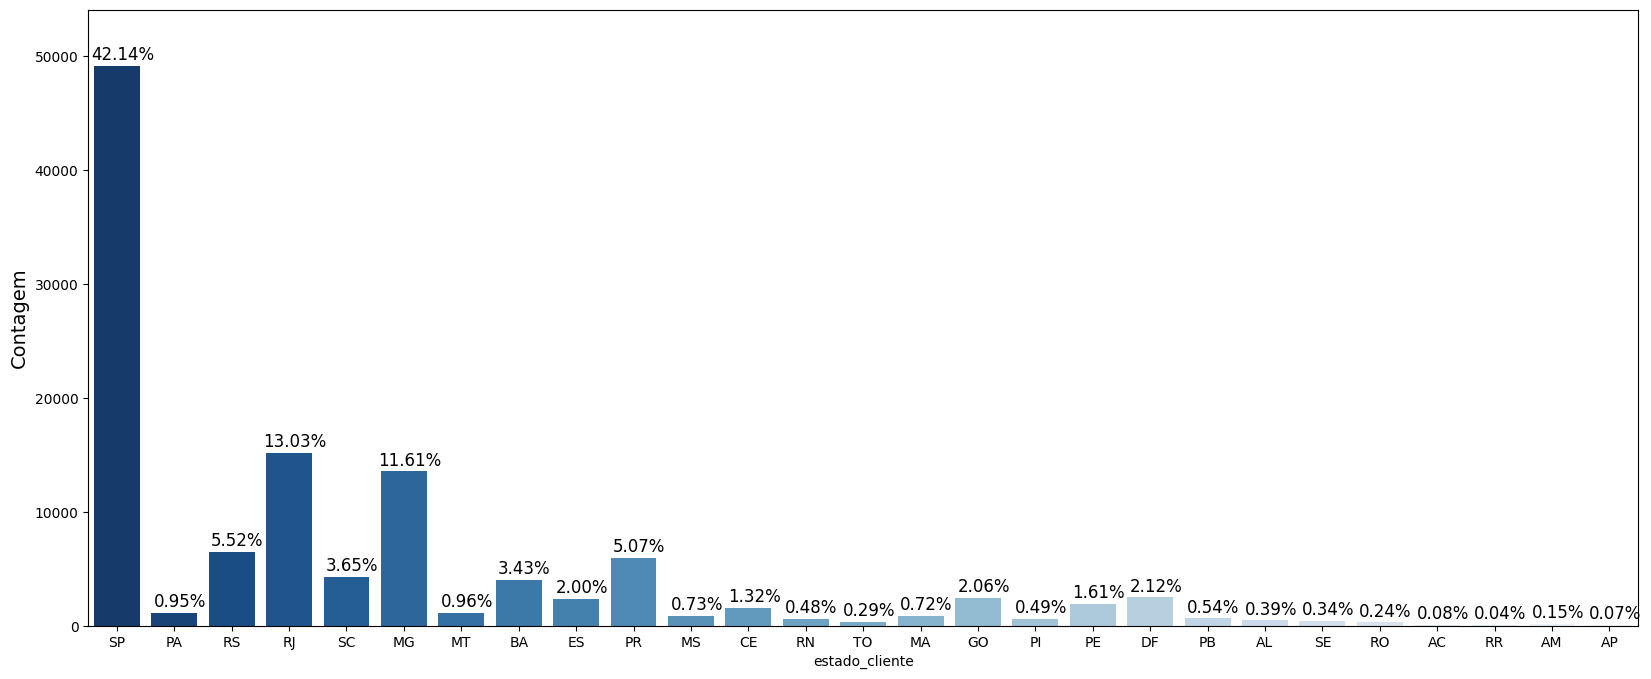

In [4]:
plot_perc('estado_cliente', df)

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3459334776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x= st, data=dados, orient='horizontal', palette='Blues_r')


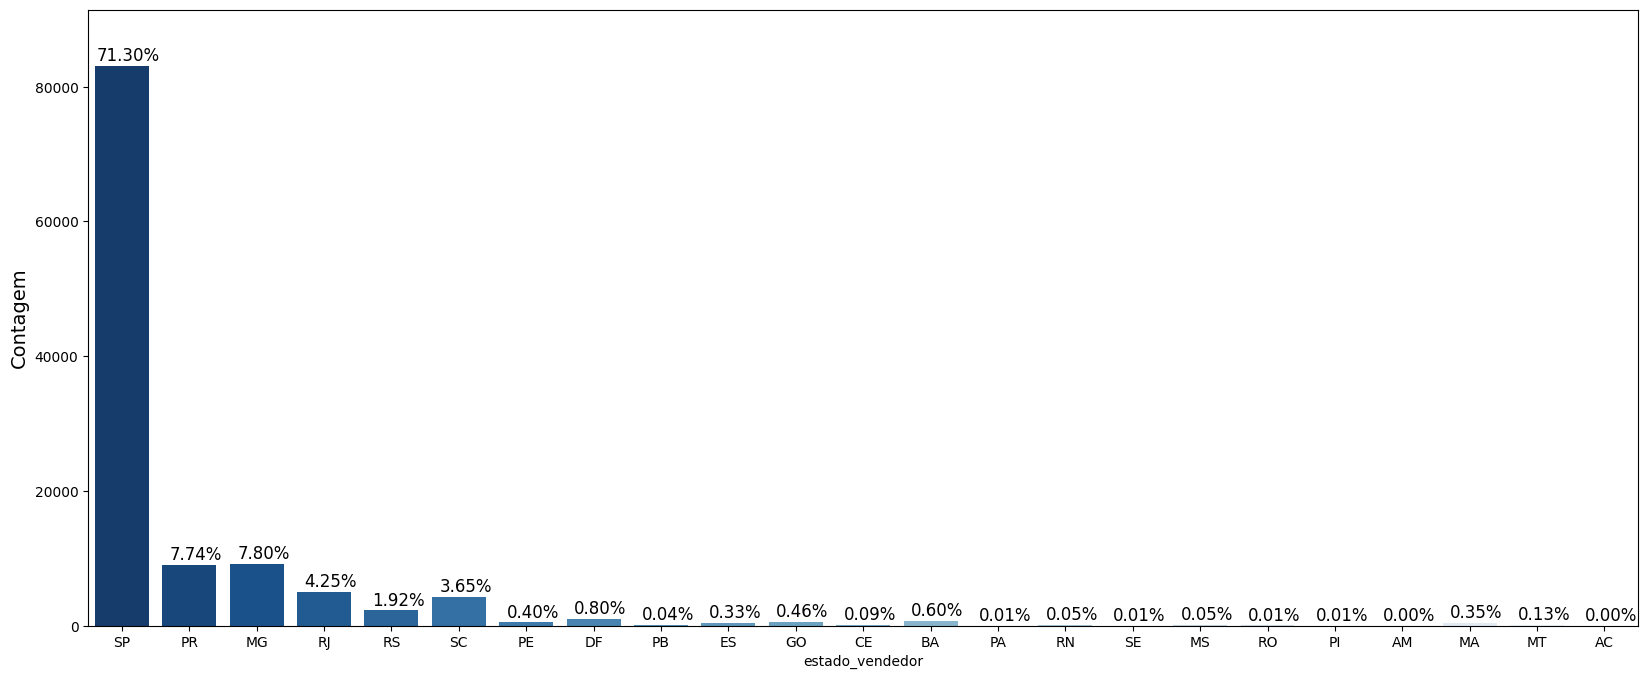

In [5]:
plot_perc('estado_vendedor', df)

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3459334776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x= st, data=dados, orient='horizontal', palette='Blues_r')


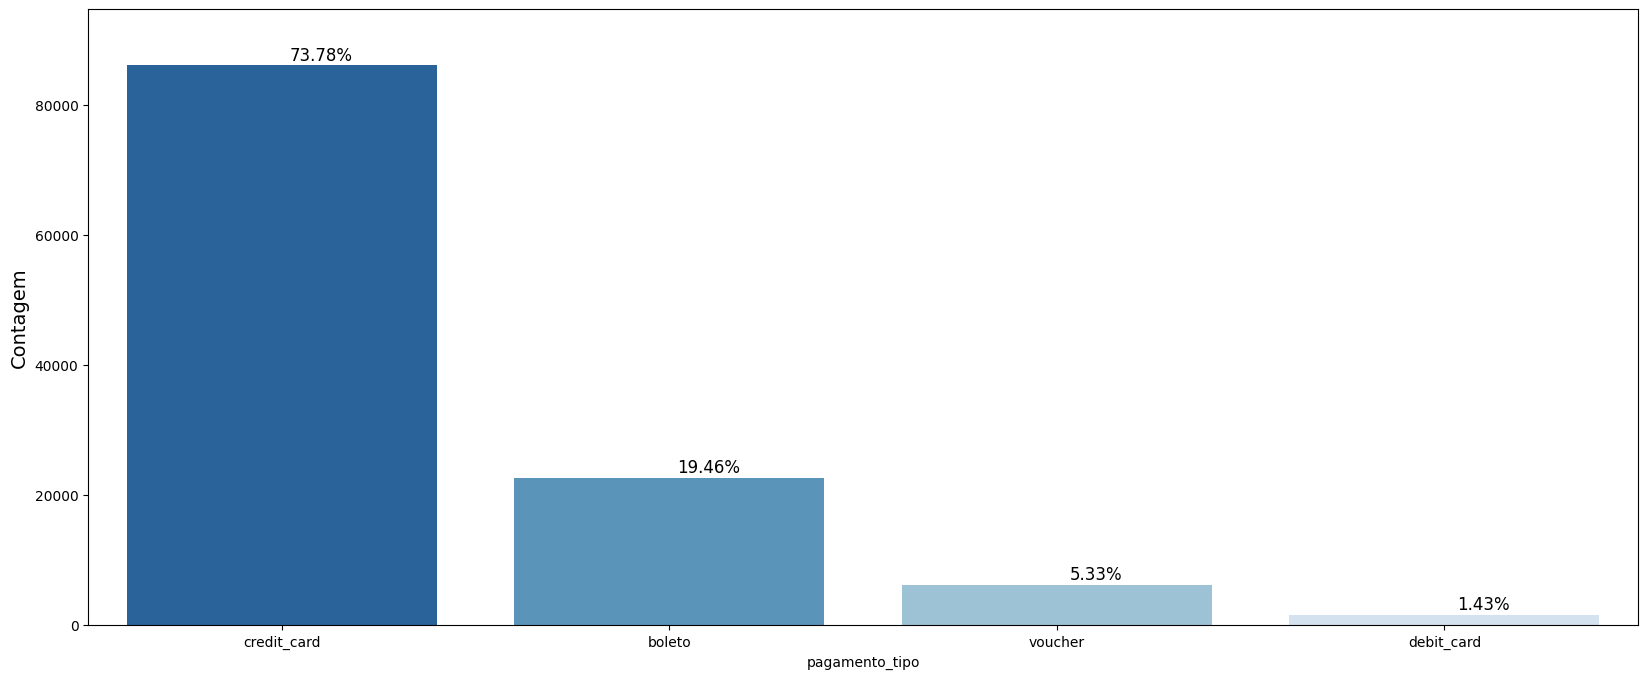

In [6]:
plot_perc('pagamento_tipo', df)

#### Importância do Método de Pagamento

A análise da distribuição dos métodos de pagamento revela que cartões de crédito representam a grande maioria das transações (73,78%), seguidos por boleto bancário (19,46%), voucher (5,33%) e cartão de débito (1,43%).

Do ponto de vista de risco, é importante observar que:

- Pagamentos por boleto e cartão de débito geralmente apresentam menor propensão a fraudes. Isso se deve ao fato de que:

    - Boletos exigem autenticação bancária e o pagamento é processado de forma indireta, dificultando tentativas de uso indevido.

    - Cartões de débito normalmente estão vinculados a senhas e autenticações adicionais, tornando-os mais seguros que os de crédito.

- Em contraste, cartões de crédito, embora amplamente utilizados, estão mais sujeitos a fraudes, principalmente quando os dados do cartão são expostos ou usados em compras online sem autenticação robusta.

➡️ Implicações para o negócio: Monitorar os métodos de pagamento mais suscetíveis a fraudes (como o cartão de crédito) pode auxiliar na implementação de políticas antifraude mais eficazes, como validações adicionais em transações de alto valor ou ferramentas de machine learning que detectam comportamentos suspeitos em tempo real.

In [7]:
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [8]:
df_compra = df.groupby('id_unico_cliente')['horario_pedido'].max().reset_index()
df_compra = df_compra.rename(columns={'horario_pedido': 'horario_ultima_compra'})
df_compra['horario_ultima_compra'] = pd.to_datetime(df_compra['horario_ultima_compra'])

df_compra

,id_unico_cliente,horario_ultima_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [9]:
df_compra['Recencia'] = (df_compra['horario_ultima_compra'].max() - df_compra['horario_ultima_compra']).dt.days
df_compra.head()

,id_unico_cliente,horario_ultima_compra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [10]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on='id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [50]:
 def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [51]:
from sklearn.cluster import KMeans

df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [64]:
soma_quadrados = calcular_wcss(df_recencia)

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3466650994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3466650994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\3466650994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

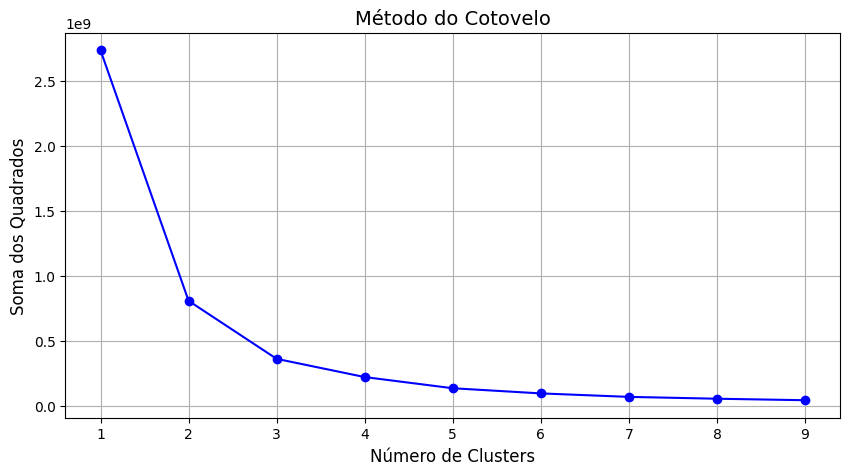

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), soma_quadrados, marker='o', color='blue')
plt.title('Método do Cotovelo', fontsize=14)
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Soma dos Quadrados', fontsize=12)
plt.xticks(range(1, 10))
plt.grid()
plt.show()

In [66]:
import math
def numero_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20,wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

#### numero\_clusters(wcss)

Função que determina o número ideal de clusters com base no método do "cotovelo".
Ela calcula a distância perpendicular de cada ponto da curva WCSS (Within-Cluster Sum of Squares) à linha que liga o primeiro e o último ponto da curva.
O índice com a maior distância indica o "cotovelo" — ou seja, o ponto onde o ganho na compactação dos clusters começa a diminuir.
Retorna o número de clusters ideal com base nesse ponto.

In [67]:
n = numero_clusters(soma_quadrados)
print('Número de clusters: ', n)

Número de clusters:  4


In [91]:
kmenas = KMeans(n_clusters=4)

df_usuario['Recencia_Cluster'] = kmenas.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [56]:
agrupado_cluster = df_usuario.groupby('Recencia_Cluster')['Recencia'].mean().reset_index()

agrupado_cluster.head()

,Recencia_Cluster,Recencia
0,0,318.687376
1,1,187.076277
2,2,489.070832
3,3,66.405850


In [92]:
agrupado_por_cluster_ordenado = agrupado_cluster.sort_values(by='Recencia',ascending=False).reset_index(drop=True)

agrupado_por_cluster_ordenado.head()

,Recencia_Cluster,Recencia
0,2,489.070832
1,0,318.687376
2,1,187.076277
3,3,66.405850


In [94]:
agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index

agrupado_cluster_ordenado.head()

,index,Recencia_Cluster,Recencia
0,0,2,507.793482
1,1,1,356.487598
2,2,3,219.333577
3,3,0,77.821535


In [95]:
juntando_cluster = pd.merge(df_usuario, agrupado_cluster_ordenado[['Recencia_Cluster', 'index']], on='Recencia_Cluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_Cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0,3


In [96]:
removendo_dados = juntando_cluster.drop(['Recencia_Cluster'], axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


In [97]:
df_final = removendo_dados.rename(columns={'index': 'Recencia_Cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


In [ ]:
def ordernador_cluster(cluster_nome, target_nome, df):
    agrupado_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    
    agrupado_cluster_ordenado = agrupado_cluster.sort_values(by=target_nome,ascending=True).reset_index(drop=True)
    
    agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index
    
    juntando_cluster = pd.merge(df,agrupado_cluster_ordenado[[cluster_nome,'index']],on=cluster_nome)
    
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    
    return df_final

In [128]:
df_usuario = ordernador_cluster('Recencia_Cluster', 'Recencia', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Frequencia_Cluster,Recencia_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,3,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,3,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,3,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,3,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,3,2


In [129]:
df_usuario.groupby('Recencia_Cluster')['Recencia'].describe()


,count,mean,std,min,25%,50%,75%,max
Recencia_Cluster,,,,,,,,
0,16144.0,509.032086,52.538828,436.0,468.0,499.0,543.0,728.0
1,23338.0,360.467606,40.727590,293.0,325.0,359.0,395.0,435.0
2,38620.0,222.783143,42.138153,152.0,186.0,221.0,264.0,292.0
3,38479.0,79.360015,42.783450,0.0,39.0,80.0,118.0,151.0


#### Análise de Recência por Cluster

A coluna Recencia representa o número de dias desde a última compra do cliente — ou seja, quanto menor o valor, mais recente foi a compra.

Na segmentação por clusters, os clientes foram agrupados com base nesse comportamento, e podemos observar:

- O Cluster 3 possui os clientes com menor média de recência (média ≈ 79 dias), o que indica que esses clientes compraram mais recentemente.
- Já o Cluster 0, por exemplo, apresenta a maior média de recência (≈ 509 dias), ou seja, clientes que estão há mais tempo sem comprar.

#### Conclusão:

Clientes no Cluster 3 são os mais recentes, e quanto menor o número de dias na coluna Recencia, mais ativo e engajado tende a ser o cliente.

Esse tipo de análise é fundamental para estratégias de CRM, campanhas de reativação ou ações de fidelização.

In [ ]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()

df_frequencia.columns = ['id_unico_cliente', 'Frequencia']

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [106]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_Cluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,2,1


In [107]:
df_frequencia = df_usuario[['Frequencia']]

kmenas = KMeans(n_clusters=4)
df_usuario['Frequencia_Cluster'] = kmenas.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_Cluster,Frequencia,Frequencia_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1,2,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1,2,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,2,1,0


In [118]:
df_usuario.groupby('Frequencia_Cluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencia_Cluster,,,,,,,,
0,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
1,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
2,5598.0,7.110397,2.561719,5.0,5.0,6.0,8.0,15.0
3,110394.0,1.399650,0.746239,0.0,1.0,1.0,2.0,4.0


In [131]:
df_usuario =ordernador_cluster('Frequencia_Cluster', 'Frequencia', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Recencia_Cluster,Frequencia_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,1,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,1,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,2,0


In [132]:
df_usuario.groupby('Frequencia_Cluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencia_Cluster,,,,,,,,
0,110394.0,1.399650,0.746239,0.0,1.0,1.0,2.0,4.0
1,5598.0,7.110397,2.561719,5.0,5.0,6.0,8.0,15.0
2,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


#### Análise de Frequência por Cluster

A coluna Frequencia representa o número de compras realizadas pelo cliente em um determinado período. Assim, quanto maior a frequência, mais ativo e engajado é o cliente.

Com base na clusterização, temos os seguintes insights:

- O Cluster 3 agrupa os clientes com frequência máxima (75 compras), indicando os clientes mais fiéis e altamente ativos.
- O Cluster 2 possui clientes com frequência média alta, com média de ~24 compras.
- O Cluster 1 representa clientes com frequência intermediária (média ~7).
- Já o Cluster 0 contém a maior parte dos clientes, mas com baixa frequência de compra (média ≈ 1.4), sugerindo clientes esporádicos ou menos engajados.

##### Conclusão

Clientes no Cluster 3 são os mais frequentes, compram com muita regularidade e representam um perfil valioso para estratégias de fidelização, programas de recompensa ou cross-sell.
Já os clientes do Cluster 0 podem ser alvo de campanhas de reengajamento, com foco em aumentar a frequência de compras.






In [138]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'Receita']


In [139]:
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Recencia_Cluster,Frequencia_Cluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,0,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,1,0,551.58
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,1,0,551.58
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,0,140.61
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,2,0,137.58


In [140]:
df_pagmento = df_usuario[['Receita']]

kmenas = KMeans(n_clusters=4)

df_usuario['Receita_Cluster'] = kmenas.fit_predict(df_pagmento)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Recencia_Cluster,Frequencia_Cluster,Receita,Receita_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,1,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,1,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,2,0,137.58,0


In [141]:
df_usuario =ordernador_cluster('Receita_Cluster', 'Receita', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Recencia_Cluster,Frequencia_Cluster,Receita,Receita_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,1,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,1,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,2,0,137.58,0


In [143]:
df_usuario.groupby('Receita_Cluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
Receita_Cluster,,,,,,,,
0,114763.0,258.095126,364.892800,9.59,69.90,132.57,269.10,2950.16
1,1619.0,5650.053385,2881.999747,2951.83,3557.12,4491.44,6914.63,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


#### Análise de Receita por Cluster

A coluna Receita representa o valor total gerado por cada cliente.

- O Cluster 3 possui os clientes de maior valor, com receita fixa em 109 mil, indicando clientes VIPs.
- O Cluster 2 tem uma média alta (~27 mil), também representando clientes de alto valor.
- O Cluster 1 é intermediário, com média de ~5,6 mil.
- O Cluster 0 tem a maior quantidade de clientes, mas com receita baixa (média ~258), representando os clientes menos lucrativos.

#### Conclusão:

Clientes dos clusters 2 e 3 são os mais rentáveis.
Já o Cluster 0 pode ser foco de estratégias para aumentar o ticket médio.


In [144]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,Recencia_Cluster,Frequencia_Cluster,Receita,Receita_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,1,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,1,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,2,0,137.58,0


In [150]:
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'Recencia_Cluster', 'Frequencia', 'Frequencia_Cluster', 'Receita', 'Receita_Cluster']]
df_final.tail()

,id_unico_cliente,Recencia,Recencia_Cluster,Frequencia,Frequencia_Cluster,Receita,Receita_Cluster
116576,c5da6424f1f5decedef8672a1a0103e1,12,3,1,0,314.32,0
116577,8d80e477643ec569b24592ce3d9dfc4c,41,3,2,0,169.26,0
116578,8d80e477643ec569b24592ce3d9dfc4c,41,3,2,0,169.26,0
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,36,3,1,0,77.50,0
116580,428f4721a509be8c52de6ec2900ba918,10,3,1,0,24.69,0


In [151]:
df_final['Pontuacao'] = df_final['Recencia_Cluster'] + df_final['Frequencia_Cluster'] + df_final['Receita_Cluster']
df_final.head()

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\2832439272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pontuacao'] = df_final['Recencia_Cluster'] + df_final['Frequencia_Cluster'] + df_final['Receita_Cluster']


,id_unico_cliente,Recencia,Recencia_Cluster,Frequencia,Frequencia_Cluster,Receita,Receita_Cluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,0,551.58,0,1
2,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,0,551.58,0,1
3,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
4,23397e992b09769faf5e66f9e171a241,211,2,1,0,137.58,0,2


In [157]:
df_final.Pontuacao.max()

np.int64(7)

In [159]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >=1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Premium'
df_final.tail()

C:\Users\foxgh\AppData\Local\Temp\ipykernel_10780\2622947909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Segmento'] = 'Inativo'


,id_unico_cliente,Recencia,Recencia_Cluster,Frequencia,Frequencia_Cluster,Receita,Receita_Cluster,Pontuacao,Segmento
116576,c5da6424f1f5decedef8672a1a0103e1,12,3,1,0,314.32,0,3,Master
116577,8d80e477643ec569b24592ce3d9dfc4c,41,3,2,0,169.26,0,3,Master
116578,8d80e477643ec569b24592ce3d9dfc4c,41,3,2,0,169.26,0,3,Master
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,36,3,1,0,77.50,0,3,Master
116580,428f4721a509be8c52de6ec2900ba918,10,3,1,0,24.69,0,3,Master


In [161]:
df_final.to_csv('../Dataset/Segmentacao.csv', index=False)